La Min Oo ID- 6540039
Assignment 7

Question 1: Design and Initialize Neural Network

# 1.1 Network Design and Truth Table Creation

For the logical function: (x1 AND x2) OR (x3 AND x4) ,

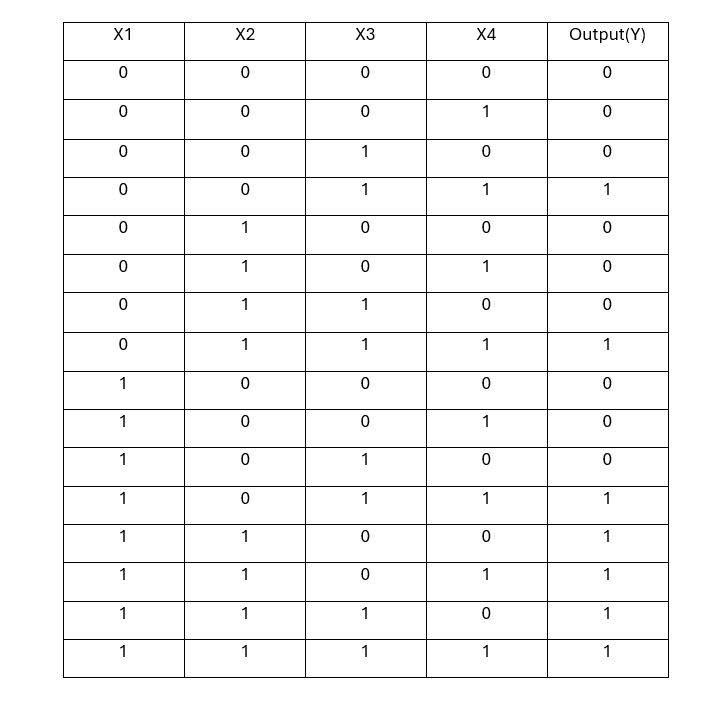

# 1.2 Manual Forward Propagation Calculation

Weight : w1=w2=w3=w4=0.5
Bias : b = 1

I choose an input example x= [1,1,0,0] and output is 1.
-Weighted SUM,
 z= (1*0.5)+(1*0.5)+(0*0.5)+(0*0.5)+1= 2
-Using Sigmoid Function,
 Y(pred) = 1/1+e^(-z)= 1/1+e^(-2)≈0.8808
 The predicted output for the x= [1,1,0,0] is approximately 0.8808.


# 1.3 Manual Backpropagation Calculation

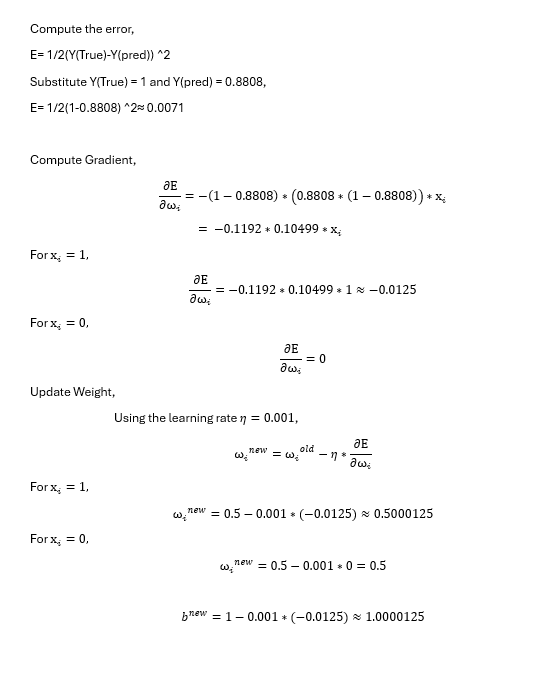


# 1.4 Implementation and Training in Python

Epoch 0, Average Loss: 2.4241116469185795
Epoch 1000, Average Loss: 0.7147931028065986
Epoch 2000, Average Loss: 0.6935305203836295
Epoch 3000, Average Loss: 0.6870924883908366
Epoch 4000, Average Loss: 0.684002104132329
Epoch 5000, Average Loss: 0.6822447511496037
Epoch 6000, Average Loss: 0.681064182957326
Epoch 7000, Average Loss: 0.6804133230390227
Epoch 8000, Average Loss: 0.6797982238822132
Epoch 9000, Average Loss: 0.6793964081045704
Final weights: [4.03427821 4.03399132 4.03309143 4.03510263]
Final bias: [-8.75262528]
Input: [0 0 0 0], Predicted Output: 0.0002, Actual Target: 0
Input: [0 0 0 1], Predicted Output: 0.0089, Actual Target: 0
Input: [0 0 1 0], Predicted Output: 0.0088, Actual Target: 0
Input: [0 0 1 1], Predicted Output: 0.3353, Actual Target: 1
Input: [0 1 0 0], Predicted Output: 0.0088, Actual Target: 0
Input: [0 1 0 1], Predicted Output: 0.3355, Actual Target: 0
Input: [0 1 1 0], Predicted Output: 0.3350, Actual Target: 0
Input: [0 1 1 1], Predicted Output: 0.966

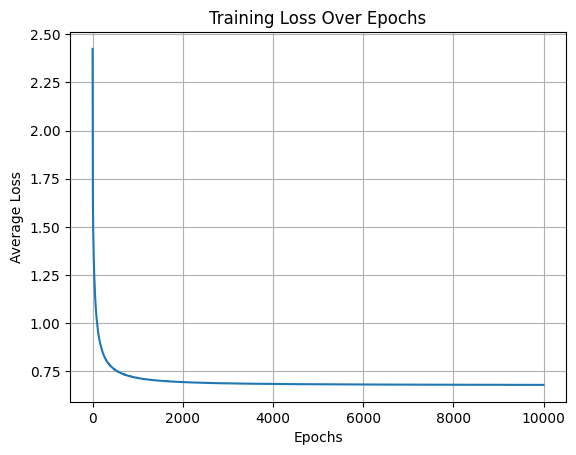

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initializing weights and bias
np.random.seed(42)  # for reproducibility
weights = np.random.rand(4)  # weights for four inputs
bias = np.random.rand(1)  # one bias

# Truth table inputs and outputs
inputs = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
])
targets = np.array([
    [0],
    [0],
    [0],
    [1],
    [0],
    [0],
    [0],
    [1],
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [1],
    [1]
])

# Learning rate
learning_rate = 0.1  # Increased for faster convergence

# List to store average loss at each epoch
loss_history = []

# Training loop
for epoch in range(10000):  # Reduced number of epochs
    total_error = 0
    indices = np.arange(len(inputs))
    np.random.shuffle(indices)  # Shuffle the data for each epoch

    for i in indices:
        input_layer = inputs[i]
        target = targets[i]  # Rename to avoid overwriting outputs

        z = np.dot(input_layer, weights) + bias
        output = sigmoid(z)
        error = 0.5 * (target - output) ** 2
        total_error += error

        # Gradients for weights and bias
        dE_dy = output - target
        dy_dz = sigmoid_derivative(z)
        dz_dw = input_layer
        dz_db = 1

        gradient_weights = dE_dy * dy_dz * dz_dw
        gradient_bias = dE_dy * dy_dz * dz_db

        # Update weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

    # Store the average loss for this epoch
    average_loss = total_error.mean()
    loss_history.append(average_loss)

    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Average Loss: {average_loss}")  # Use mean for readability

# Final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)

# Predictions after training
for i in range(len(inputs)):
    z = np.dot(inputs[i], weights) + bias
    output = sigmoid(z)
    print(f"Input: {inputs[i]}, Predicted Output: {output[0]:.4f}, Actual Target: {targets[i][0]}")

# Plot the loss history
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.grid()
plt.show()


# Discussion of the effectiveness of neutral network

The neural network shows partial effectiveness in learning the truth table, as it reduces the loss significantly during training but struggles with some predictions. While it correctly identifies most outputs close to 0 or 1, its predictions for certain inputs (e.g., [0, 0, 1, 1] or [1, 1, 0, 0]) deviate from the actual targets. This suggests the network may not have fully captured the underlying logic of the problem, potentially requiring more hidden layers or adjustments to the learning process. The final weights and bias indicate that the model has learned some patterns, but it is not yet perfectly accurate. Further optimization or a more complex architecture might improve performance.